**GAIZKIA ADELINE ATMAKA**

**2501972493 LA05**

**FINAL EXAM TEXT MINING (NO. 3B)**

Link Video:https://www.youtube.com/playlist?list=PLgEV6IOXdLB9B6nS4YW68-9W8oyTpVG08


In [ ]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2583073a13bf3fca49ddd2f627619656efb38dd30007176a8ea5fee604393b6a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from rouge_score import rouge_scorer

nltk.download('punkt')
nltk.download('stopwords')

Load data from CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text Mining/Final Exam/B/data_3B.csv')
df

,Unnamed: 0,content,summary
0,5,"TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...",Wakil Presiden Ma'ruf Amin meninjau lokasi keb...
1,6,INFO NASIONAL Memperingati 14 tahun PT Sarana...,Menteri Keuangan Sri Mulyani Indrawati dan jaj...
2,7,"TEMPO.CO, Jakarta -Wacana Presiden Joko Widodo...",Wacana Presiden Joko Widodo atau Jokowi 3 peri...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      int64 
 1   content     3 non-null      object
 2   summary     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


Semua data tidak ada yang null, dengan jumlah kolom 3: 1 bertype integer dan 2 lainnya dalam object

In [ ]:
df['content'][0]

'TEMPO.CO, Jakarta - Wakil Presiden Ma\'ruf Amin meninjau lokasi kebakaran Depo Pertamina di Plumpang, Jakarta Utara pada Sabtu siang, 4 Maret 2023. Dalam tinjauan itu, Ma\'ruf ditemani Menteri BUMN Erick Thohir melihat kondisi kondisi rumah warga yang hancur akibat terbakar."Korban semua sudah ada yang meninggal sekitar 17 orang, kemudian yang dirawat ada 60 orang luka-luka, kemudin ada yang di penampungan. Nah, semuanya ditanggulangi oleh Pertamina," ujar Ma\'ruf saat ditemui di lokasi, Sabtu, 4 Maret 2023.Ma\'ruf menyebut Pertamina juga bakal menanggung biaya makan para korban yang mengungsi. Ia berharap tidak ada masalah yang bakal dihadapi oleh para korban selamat. Lebih lanjut, Ma\'ruf menyebut pihaknya berencana memindahkan depo Pertamina ke sekitar pelabuhan agar lebih aman."Daerah ini akan ditata ulang supaya lebih teratur, lebih baik, aman, dan memenuhi persyaratan sebagai suatu daerah yang berada di wilayah Ibu Kota," kata Ma\'ruf.Kronologi Kebakaran PlumpangKebakaran depo P

In [ ]:
df['summary'][0]

"Wakil Presiden Ma'ruf Amin meninjau lokasi kebakaran Depo Pertamina di Plumpang, Jakarta Utara pada Sabtu siang, 4 Maret 2023. Dalam tinjauan itu, Ma'ruf ditemani Menteri BUMN Erick Thohir melihat kondisi kondisi rumah warga yang hancur akibat terb"

Melakukan tokenize text ke dalam kalimat dan kata, case folding, remove stop words

In [ ]:
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('indonesian'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return sentences, filtered_words

disini saya tidak meremove angka, karena menurut saya konteks angka pada berita yang dimiliki cukup penting (contohnya seperti, jumlah korban jiwa, dan nominal uang)

Melakukan pendekatan extractive menggunakan FreqDist

> FreqDist digunakan untuk menghitung jumlah kemunculan setiap kata dalam data. FreqDist akan mencari frekuensi setiap kata unik yang muncul dan pentingnya kata-kata tersebut dalam konteks data yang dimiliki.

In [ ]:
def calculate_word_frequencies(words):
    word_freq = FreqDist(words)
    return word_freq

# Menghitung score sentences berdasarkan word frequencies
def score_sentences(sentences, word_freq):
    sentence_scores = {}
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        score = sum(word_freq[word] for word in words if word in word_freq)
        sentence_scores[sentence] = score
    return sentence_scores

# Extract top n sentences berdasarkan score sentences
def extract_top_sentences(sentence_scores, n):
    top_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:n]
    return top_sentences

Evaluate hasil summarization menggunakan ROUGE score

In [ ]:
def evaluate_rouge(reference_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

In [ ]:
# Visualize sentence scores
def plot_sentence_scores(sentence_scores, title="Sentence Scores"):
    sentences = list(sentence_scores.keys())
    scores = list(sentence_scores.values())

    plt.figure(figsize=(12, 12))
    y_pos = range(len(sentences))
    plt.barh(y_pos, scores, align='center', alpha=0.7, color='blue')
    plt.yticks(y_pos, sentences)
    plt.xlabel('Score')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
def generate_summary_for_row(row):
    content = row['content']
    reference_summary = row['summary']

    # Tokenize text dan remove stopwords
    sentences, words = tokenize_text(content)

    # Calculate word frequencies
    word_freq = calculate_word_frequencies(words)

    # Calculate score sentences
    sentence_scores = score_sentences(sentences, word_freq)

    # Extract top 3 and top 5 sentences
    top_3_sentences = extract_top_sentences(sentence_scores, 3)
    top_5_sentences = extract_top_sentences(sentence_scores, 5)

    # Generate summaries
    summary_3 = ' '.join(top_3_sentences)
    summary_5 = ' '.join(top_5_sentences)

    # Plot sentence scores
    plot_sentence_scores(sentence_scores, title=f"Sentence Scores for Document: {row['Unnamed: 0']}")

    # Evaluate summaries with ROUGE score
    rouge_scores_3 = evaluate_rouge(reference_summary, summary_3)
    rouge_scores_5 = evaluate_rouge(reference_summary, summary_5)

    return {
        'document': row['Unnamed: 0'],
        'original_content': content,
        'reference_summary': reference_summary,
        'generated_summary_top3': summary_3,
        'generated_summary_top5': summary_5,
        'rouge_scores_top3': rouge_scores_3,
        'rouge_scores_top5': rouge_scores_5
    }

In [ ]:
def main(df):
    results = []
    for index, row in df.iterrows():
        summary_result = generate_summary_for_row(row)
        results.append(summary_result)

    # Menyimpan result ke dalam DataFrame
    results_df = pd.DataFrame(results)

    # Menyimpan DataFrame ke dalam bentuk CSV
    results_df.to_csv('summarization_results.csv', index=False)

    return results

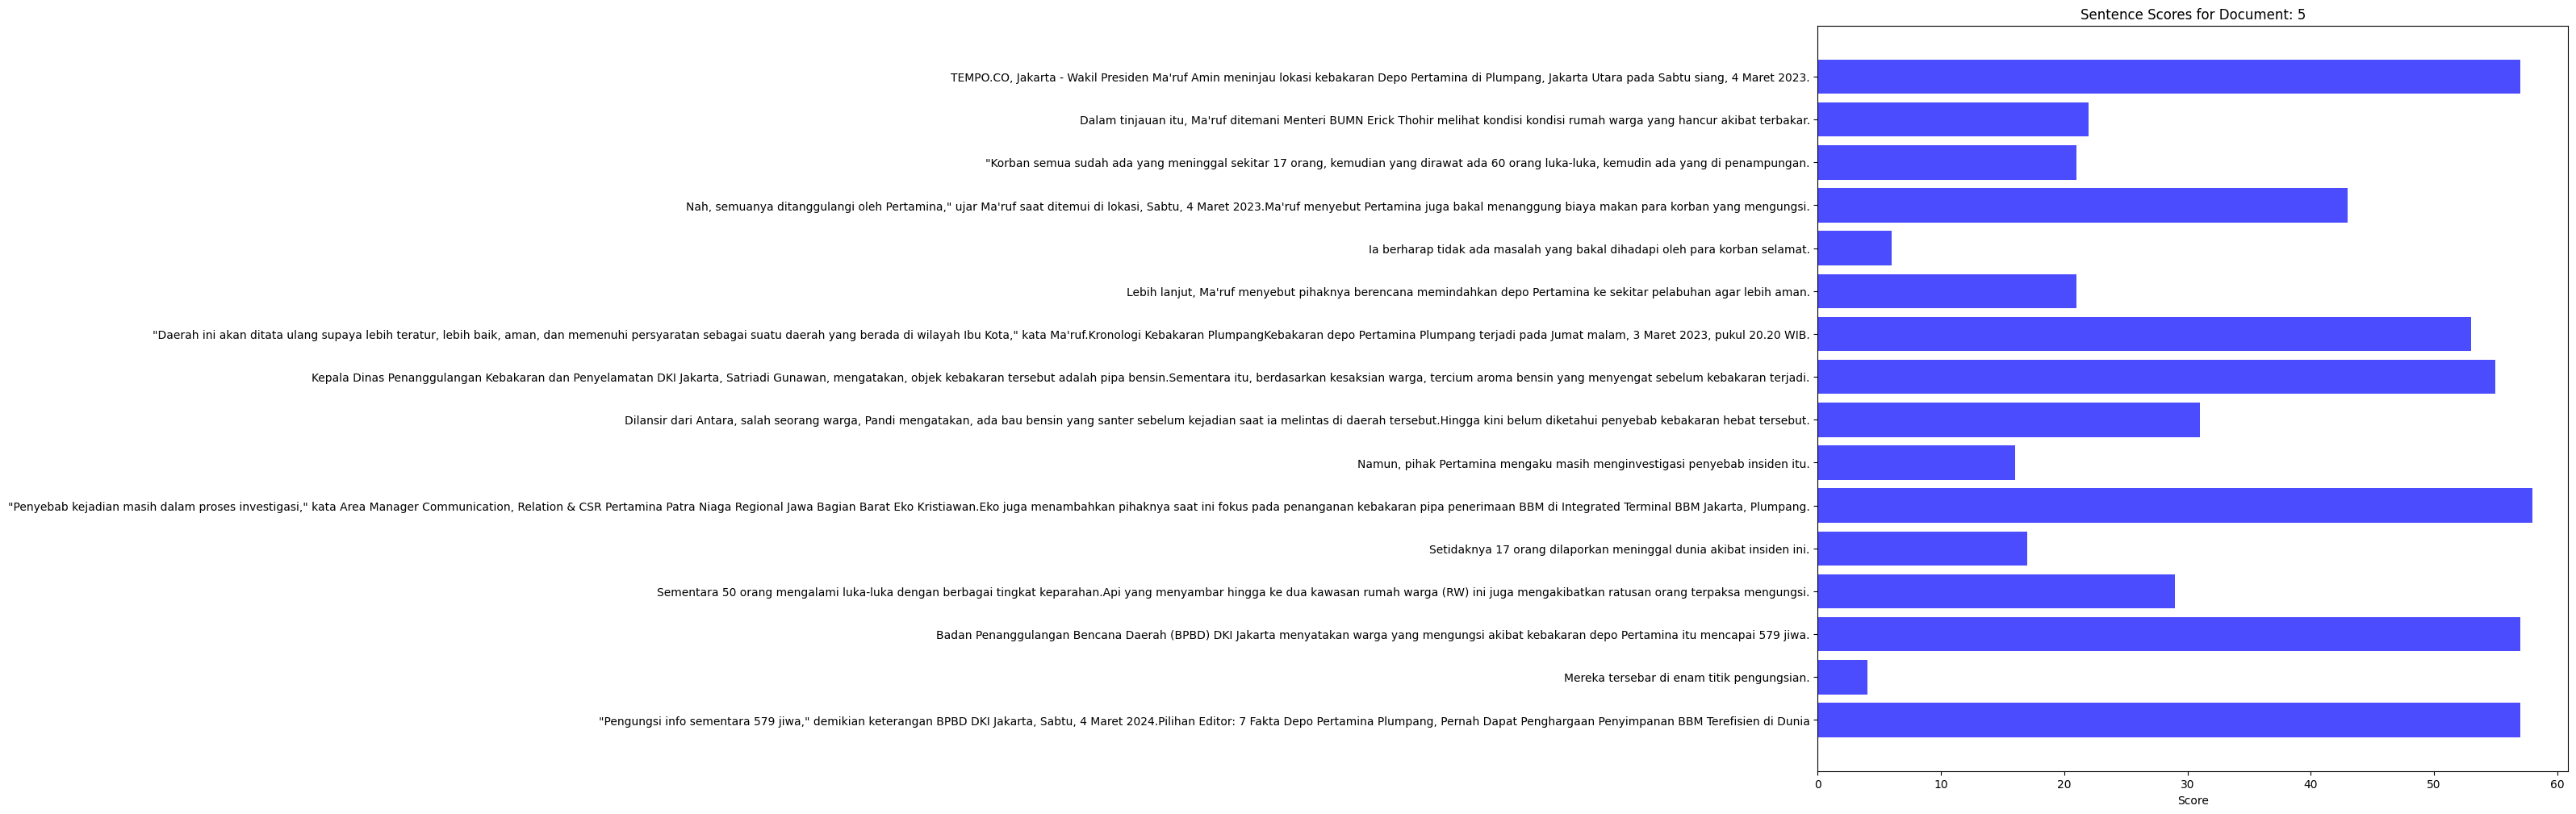

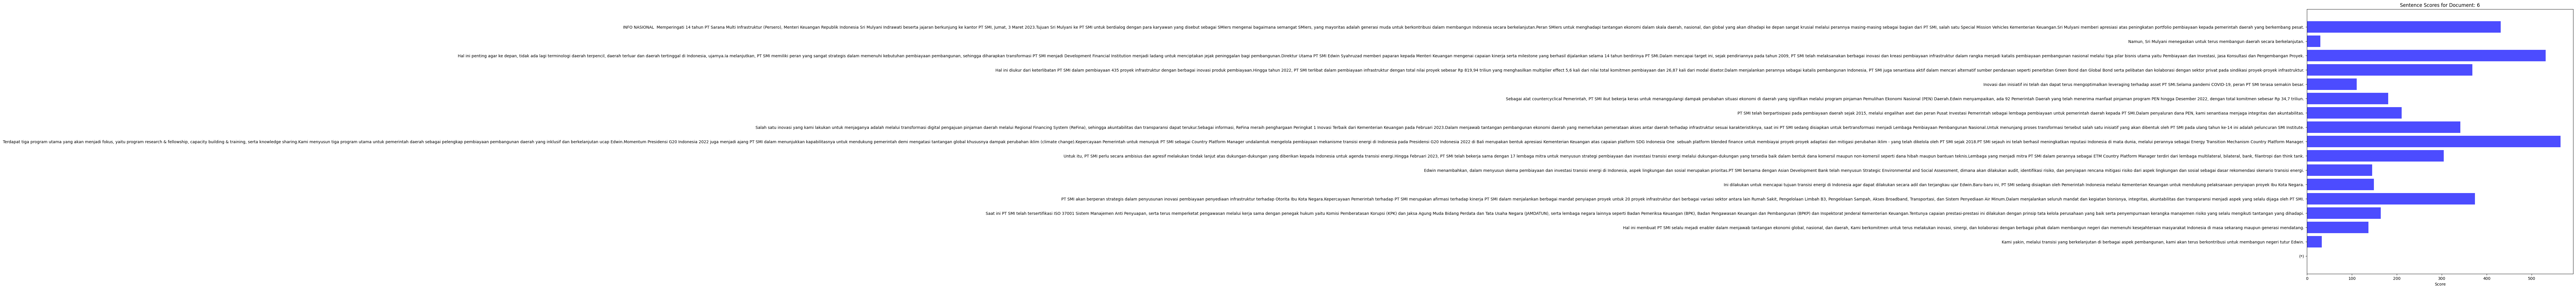

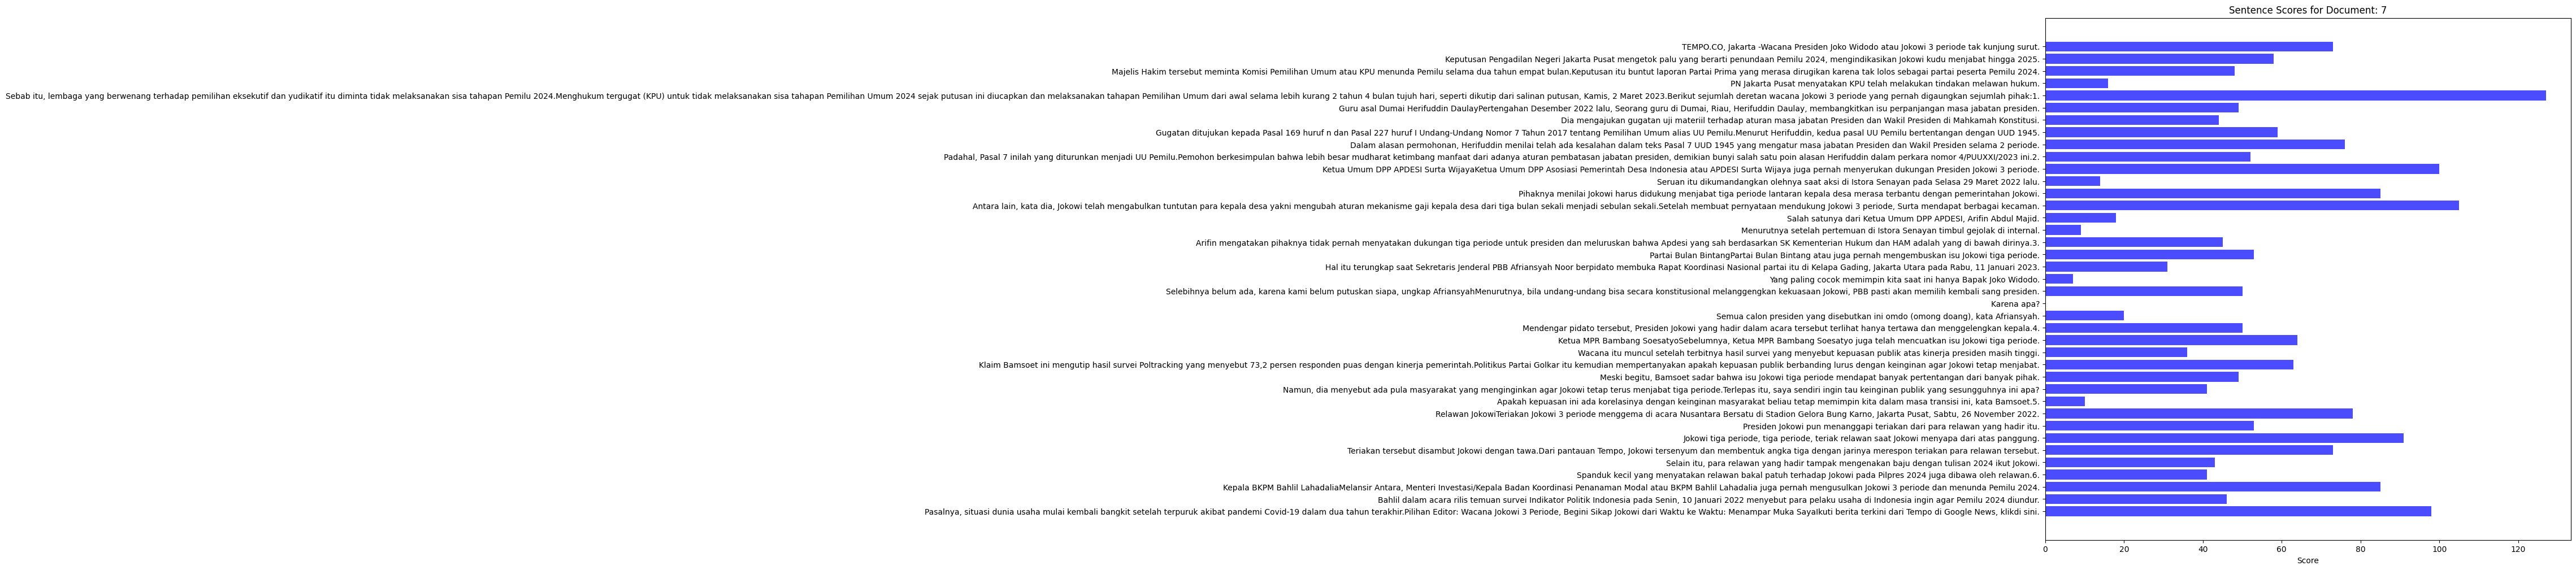

Document: 5
Original Content:
TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin meninjau lokasi kebakaran Depo Pertamina di Plumpang, Jakarta Utara pada Sabtu siang, 4 Maret 2023. Dalam tinjauan itu, Ma'ruf ditemani Menteri BUMN Erick Thohir melihat kondisi kondisi rumah warga yang hancur akibat terbakar."Korban semua sudah ada yang meninggal sekitar 17 orang, kemudian yang dirawat ada 60 orang luka-luka, kemudin ada yang di penampungan. Nah, semuanya ditanggulangi oleh Pertamina," ujar Ma'ruf saat ditemui di lokasi, Sabtu, 4 Maret 2023.Ma'ruf menyebut Pertamina juga bakal menanggung biaya makan para korban yang mengungsi. Ia berharap tidak ada masalah yang bakal dihadapi oleh para korban selamat. Lebih lanjut, Ma'ruf menyebut pihaknya berencana memindahkan depo Pertamina ke sekitar pelabuhan agar lebih aman."Daerah ini akan ditata ulang supaya lebih teratur, lebih baik, aman, dan memenuhi persyaratan sebagai suatu daerah yang berada di wilayah Ibu Kota," kata Ma'ruf.Kronologi Kebakaran P

In [ ]:
if __name__ == "__main__":
    summarization_results = main(df)

    for result in summarization_results:
        print(f"Document: {result['document']}")
        print(f"Original Content:\n{result['original_content']}\n")
        print(f"Reference Summary:\n{result['reference_summary']}\n")
        print(f"Generated Summaries:\nTop 3:\n{result['generated_summary_top3']}\nTop 5:\n{result['generated_summary_top5']}\n")
        print(f"ROUGE Scores:")
        print(f"Top 3 : {result['rouge_scores_top3']}")
        print(f"Top 5 : {result['rouge_scores_top5']}")
        print("---------------------------------------------------------------------------\n")

# Analisa

Contoh dari document 5



Hasil top 3


"Penyebab kejadian masih dalam proses investigasi," kata Area Manager Communication, Relation & CSR Pertamina Patra Niaga Regional Jawa Bagian Barat Eko Kristiawan.Eko juga menambahkan pihaknya saat ini fokus pada penanganan kebakaran pipa penerimaan BBM di Integrated Terminal BBM Jakarta, Plumpang. TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin meninjau lokasi kebakaran Depo Pertamina di Plumpang, Jakarta Utara pada Sabtu siang, 4 Maret 2023. Badan Penanggulangan Bencana Daerah (BPBD) DKI Jakarta menyatakan warga yang mengungsi akibat kebakaran depo Pertamina itu mencapai 579 jiwa.

Hasil Top 5


"Penyebab kejadian masih dalam proses investigasi," kata Area Manager Communication, Relation & CSR Pertamina Patra Niaga Regional Jawa Bagian Barat Eko Kristiawan.Eko juga menambahkan pihaknya saat ini fokus pada penanganan kebakaran pipa penerimaan BBM di Integrated Terminal BBM Jakarta, Plumpang. TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin meninjau lokasi kebakaran Depo Pertamina di Plumpang, Jakarta Utara pada Sabtu siang, 4 Maret 2023. Badan Penanggulangan Bencana Daerah (BPBD) DKI Jakarta menyatakan warga yang mengungsi akibat kebakaran depo Pertamina itu mencapai 579 jiwa. "Pengungsi info sementara 579 jiwa," demikian keterangan BPBD DKI Jakarta, Sabtu, 4 Maret 2024.Pilihan Editor: 7 Fakta Depo Pertamina Plumpang, Pernah Dapat Penghargaan Penyimpanan BBM Terefisien di Dunia Kepala Dinas Penanggulangan Kebakaran dan Penyelamatan DKI Jakarta, Satriadi Gunawan, mengatakan, objek kebakaran tersebut adalah pipa bensin.Sementara itu, berdasarkan kesaksian warga, tercium aroma bensin yang menyengat sebelum kebakaran terjadi.

**Menurut saya hasl summarization yang dihasilkan sangat menggambarkan isi pokok beritanya. Baik yang top 3 dan top 5 berhasil memberikan summary yang sesuai dengan realita dan fakta berita, dan tidak mensalah artikan berita ke arah yang lain.**

# Evaluasi Hasil ROUGE score

ROUGE-1: Mengukur kesamaan unigram (kata tunggal) antara summary yang dihasilkan dengan referensi.


ROUGE-2: Mengukur kesamaan bigram (pasangan kata) antara summary yang dihasilkan dengan referensi.


ROUGE-L: Mengukur kesamaan urutan terpanjang antara summary yang dihasilkan dengan referensi.



Nilai ROUGE score mengindikasi seberapa baik summary mempertahankan informasi penting dari teks asli. Evaluasi ini membantu dalam menilai apakah pendekatan yang digunakan dapat menghasilkan summarization yang baik atau tidak.




Contoh


Top 3 ROUGE-1

Precision: 30.49%
Ini berarti dari semua unigram yang diprediksi sebagai benar oleh model, sebesar 30.49% adalah benar-benar terindikasi benar.

Recall: 64.10%
Dari semua unigram yang seharusnya muncul dalam summary reference, model berhasil mengidentifikasi 64.10% di antaranya.

F-measure: 41.32%
Mean dari precision dan recall adalah 41.32%.

Hasil keseluruhan Rouge score masih sangat jelek pada bagian precision, dan agak baik pada recallnya. Dimana nilai recall tertinggi ada pada document 6 yaitu sebesar 92%